In [1]:
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np
import arviz as az

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_drugs, p_placebo]


d:\Programy\Anaconda\envs\python3.11.7\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 2_500 tune and 2_000 draw iterations (10_000 + 8_000 draws total) took 36 seconds.


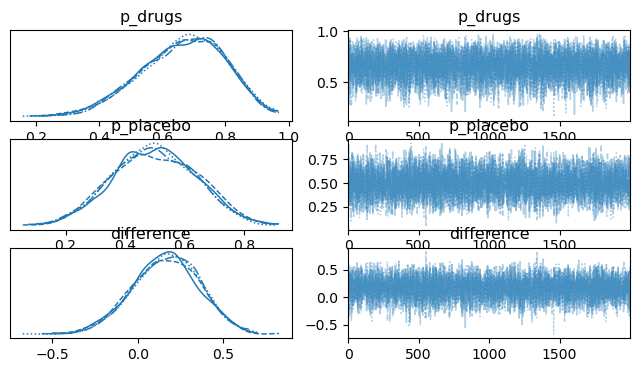

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p_drugs,0.665,0.132,0.419,0.899,0.002,0.001,6756.0,5154.0,1.0
p_placebo,0.500,0.139,0.240,0.755,0.002,0.001,7798.0,5971.0,1.0
difference,0.165,0.192,-0.200,0.517,0.002,0.002,7143.0,5975.0,1.0


In [2]:
drugs = np.concatenate((np.ones(7), np.zeros(3)))
placebo = np.concatenate((np.ones(5), np.zeros(5)))
with pm.Model() as model:
    p_drugs = pm.Uniform("p_drugs", lower=0, upper=1)
    p_placebo = pm.Uniform("p_placebo", lower=0, upper=1)
    
    obs_drugs = pm.Bernoulli("obs_drugs", p_drugs, observed=drugs)
    obs_placebo = pm.Bernoulli("obs_placebo", p_placebo, observed=placebo)

    diff = pm.Deterministic("difference", p_drugs - p_placebo)
    
    idata = pm.sample(2000, tune=2500)
az.plot_trace(idata, show=True, legend=False, figsize=(8, 4))
az.summary(idata)

p_drugs (prawdopodobieństwo wyleczenia w grupie leku):

-Średnia 0.665 sugeruje, że estymowane prawdopodobieństwo wyleczenia w grupie leku wynosi około 66,5%.
-Odchylenie standardowe 0.132 sugeruje umiarkowaną niepewność co do tego oszacowania.
-Przedział HDI [0.419, 0.899] z dużą rozpiętością, sugerujący większą niepewność co do tego oszacowania.

p_placebo (prawdopodobieństwo wyleczenia w grupie placebo):

-Średnia 0.500 oznacza, że oszacowane prawdopodobieństwo wyleczenia w grupie placebo wynosi około 50%.
-Odchylenie standardowe 0.139 wskazuje na porównywalny poziom niepewności jak w grupie leku.
-Przedział HDI [0.240, 0.755] z dużą rozpiętością, sugerujący większą niepewność co do tego oszacowania.

difference (różnica prawdopodobieństw między grupą leku a placebo):

-Średnia 0.165 różnica wynosi 16,5%, co sugeruje nieznaczną przewagę skuteczności leku nad placebo.
-Odchylenie standardowe 0.192 oznacza dużą niepewność co do tej różnicy.
-Przedział HDI [−0.200, 0.517] zawiera wartość 0, co oznacza, że nie możemy jednoznacznie stwierdzić, że lek jest skuteczniejszy od placebo.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_drugs, p_placebo]


d:\Programy\Anaconda\envs\python3.11.7\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 2_500 tune and 2_000 draw iterations (10_000 + 8_000 draws total) took 63 seconds.


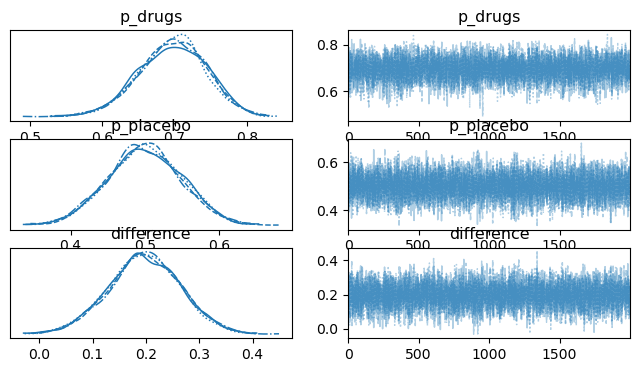

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p_drugs,0.697,0.046,0.609,0.782,0.001,0.000,7886.0,6105.0,1.0
p_placebo,0.500,0.049,0.408,0.592,0.001,0.000,8325.0,6479.0,1.0
difference,0.197,0.067,0.069,0.321,0.001,0.001,8000.0,6385.0,1.0


In [3]:
drugs = np.concatenate((np.ones(70), np.zeros(30)))
placebo = np.concatenate((np.ones(50), np.zeros(50)))
with pm.Model() as model:
    p_drugs = pm.Uniform("p_drugs", lower=0, upper=1)
    p_placebo = pm.Uniform("p_placebo", lower=0, upper=1)
    
    obs_drugs = pm.Bernoulli("obs_drugs", p_drugs, observed=drugs)
    obs_placebo = pm.Bernoulli("obs_placebo", p_placebo, observed=placebo)

    diff = pm.Deterministic("difference", p_drugs - p_placebo)
    
    idata = pm.sample(2000, tune=2500)
az.plot_trace(idata, show=True, legend=False, figsize=(8, 4))
az.summary(idata)

p_drugs (prawdopodobieństwo wyleczenia w grupie leku):

-Średnia 0.697 sugeruje, że estymowane prawdopodobieństwo wyleczenia w grupie leku wynosi około 69,7%.
-Odchylenie standardowe 0.046 sugeruje mniejszą niepewność co do tego oszacowania.
-Przedział HDI [0.609, 0.782] z mniejszą rozpiętością, sugerujący mniejszą niepewność co do tego oszacowania.

p_placebo (prawdopodobieństwo wyleczenia w grupie placebo):

-Średnia 0.500 oznacza, że oszacowane prawdopodobieństwo wyleczenia w grupie placebo wynosi około 50%.
-Odchylenie standardowe 0.049 wskazuje na porównywalny poziom niepewności jak w grupie leku.
-Przedział HDI [0.408, 0.592] z mniejszą rozpiętością, sugerujący mniejszą niepewność co do tego oszacowania.

difference (różnica prawdopodobieństw między grupą leku a placebo):

-Średnia 0.197 różnica wynosi 19,7%, co sugeruje niewiele większą przewagę skuteczności leku nad placebo.
-Odchylenie standardowe 0.067 oznacza mniejszą niepewność co do tej różnicy.
-Przedział HDI [0.069, 0.321] znajduje się powyżej zera, co sugeruje, że różnica między grupami jest prawdopodobnie istotna

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_drugs, p_placebo]


d:\Programy\Anaconda\envs\python3.11.7\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 2_500 tune and 2_000 draw iterations (10_000 + 8_000 draws total) took 329 seconds.


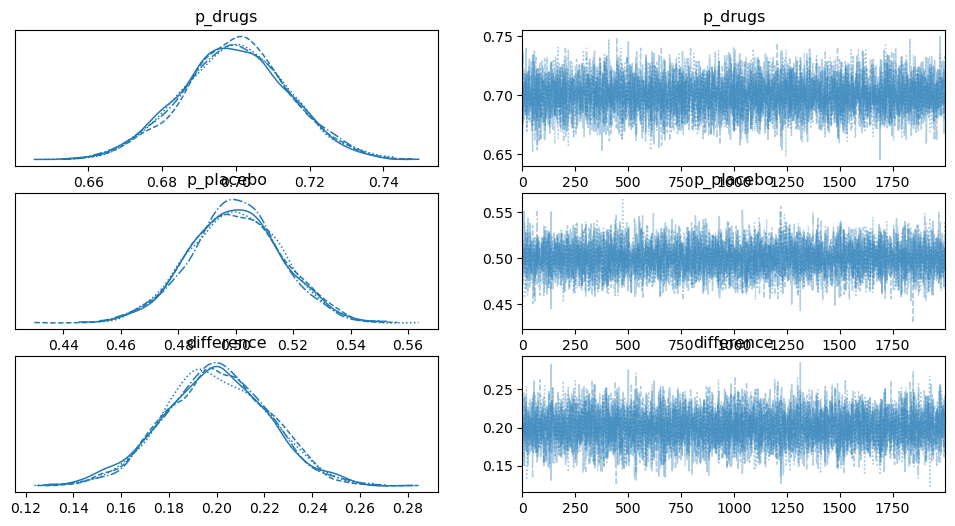

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p_drugs,0.7,0.014,0.673,0.728,0.0,0.0,7797.0,6050.0,1.0
p_placebo,0.5,0.016,0.470,0.530,0.0,0.0,7649.0,6295.0,1.0
difference,0.2,0.022,0.161,0.243,0.0,0.0,7853.0,5254.0,1.0


In [4]:
drugs = np.concatenate((np.ones(700), np.zeros(300)))
placebo = np.concatenate((np.ones(500), np.zeros(500)))
with pm.Model() as model:
    p_drugs = pm.Uniform("p_drugs", lower=0, upper=1)
    p_placebo = pm.Uniform("p_placebo", lower=0, upper=1)
    
    obs_drugs = pm.Bernoulli("obs_drugs", p_drugs, observed=drugs)
    obs_placebo = pm.Bernoulli("obs_placebo", p_placebo, observed=placebo)

    diff = pm.Deterministic("difference", p_drugs - p_placebo)
    
    idata = pm.sample(2000, tune=2500)
az.plot_trace(idata, show=True)
az.summary(idata)

p_drugs (prawdopodobieństwo wyleczenia w grupie leku):

-Średnia 0.7 sugeruje, że estymowane prawdopodobieństwo wyleczenia w grupie leku wynosi około 70%.
-Odchylenie standardowe 0.014 sugeruje niewielką niepewność co do tego oszacowania.
-Przedział HDI [0.673, 0.728] z niewielką rozpiętością, sugerujący niewielką niepewność co do tego oszacowania.

p_placebo (prawdopodobieństwo wyleczenia w grupie placebo):

-Średnia 0.500 oznacza, że oszacowane prawdopodobieństwo wyleczenia w grupie placebo wynosi około 50%.
-Odchylenie standardowe 0.016 wskazuje na porównywalny poziom niepewności jak w grupie leku.
-Przedział HDI [0.470, 0.530] z niewielką rozpiętością, sugerujący niewielką niepewność co do tego oszacowania.

difference (różnica prawdopodobieństw między grupą leku a placebo):

-Średnia 0.197 różnica wynosi 20%, co sugeruje znaczącą przewagę skuteczności leku nad placebo.
-Odchylenie standardowe 0.022 oznacza niewielką niepewność co do tej różnicy.
-Przedział HDI [0.022, 0.161] znajduje się powyżej zera, co sugeruje, że różnica między grupami jest prawdopodobnie istotna